# Étude de fraude
### Gerdy Jérôme

### Import des librairies nécessaires

In [81]:
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import train_test_split as TTS
from sklearn.ensemble import RandomForestClassifier as RF
import matplotlib.pyplot as plt
import numpy as np

### Import des dataset Fraud_Data et IpAddress_to_Country

In [3]:
df_fraud = pd.read_csv('csv_files/Fraud_Data.csv')
df_ip = pd.read_csv('csv_files/IpAddress_to_Country.csv')

### Affichage des shape des deux dataset

In [4]:
df_fraud.shape, df_ip.shape

((151112, 11), (138846, 3))

### Info et Head du dataset Fraud

In [15]:
df_fraud.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [ ]:
df_fraud.head()

### Info et Head du dataset Ip

In [16]:
df_ip.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [32]:
df_ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


#### Boucle sur le dataset des ip pour chercher avec pandas.between sur df_fraud quelle valeur est retournée à True donc correspond à l'ip

In [53]:
arr = len(df_ip)  * [0]

for i, ip in df_ip.head(5000).iterrows():
    if arr[i] == 0:
        if df_fraud["ip_address"].between(ip.lower_bound_ip_address, ip.upper_bound_ip_address, inclusive = True).any(0) == True:
            arr[i] = df_fraud.iloc[i]['ip_address']

### On recrée un nouveau DataFrame pour df_ip, celui-ci contenant une colonne pour l'adresse ip trouvée dans Fraud

In [54]:
df_new_ip = pd.DataFrame(columns=['lower_bound_ip_address', 'upper_bound_ip_address', 'country', 'ip_address'])

df = df_ip.head(5000)

for i, ip in df.iterrows():
    tempArr = {
        'lower_bound_ip_address':ip.lower_bound_ip_address,
        'upper_bound_ip_address':ip.upper_bound_ip_address,
        'country': ip.country,
        'ip_address': arr[i]
    }
    df_new_ip = df_new_ip.append(tempArr, ignore_index=True)

### Merge des dataset

In [55]:
fraud = df_fraud.head(5000)
df_final = pd.merge(df_new_ip[["country", 'ip_address']], fraud, left_on="ip_address", right_on="ip_address", how="right")

### DropNA pour supprimer les valeurs nulles

In [56]:
df_final = df_final.dropna()

### Encodage des données catégoriques

#### On regarde quelles features sont catégoriques et ont besoin d'être encodées

In [57]:
df_final.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 1451 entries, 4 to 5001
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         1451 non-null   object 
 1   ip_address      1451 non-null   float64
 2   user_id         1451 non-null   int64  
 3   signup_time     1451 non-null   object 
 4   purchase_time   1451 non-null   object 
 5   purchase_value  1451 non-null   int64  
 6   device_id       1451 non-null   object 
 7   source          1451 non-null   object 
 8   browser         1451 non-null   object 
 9   sex             1451 non-null   object 
 10  age             1451 non-null   int64  
 11  class           1451 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 147.4+ KB


In [67]:
le = LE()

df_final['country'] = le.fit_transform(df_final['country'])
df_final['signup_time'] = le.fit_transform(df_final['signup_time'])
df_final['purchase_time'] = le.fit_transform(df_final['purchase_time'])
df_final['device_id'] = le.fit_transform(df_final['device_id'])
df_final['source'] = le.fit_transform(df_final['source'])
df_final['sex'] = le.fit_transform(df_final['sex'])
df_final['browser'] = le.fit_transform(df_final['browser'])

#### On affiche l'info du dataset pour vérifier les nouveaux types des features

In [68]:
df_final.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 1451 entries, 4 to 5001
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         1451 non-null   int64  
 1   ip_address      1451 non-null   float64
 2   user_id         1451 non-null   int64  
 3   signup_time     1451 non-null   int64  
 4   purchase_time   1451 non-null   int64  
 5   purchase_value  1451 non-null   int64  
 6   device_id       1451 non-null   int64  
 7   source          1451 non-null   int64  
 8   browser         1451 non-null   int64  
 9   sex             1451 non-null   int64  
 10  age             1451 non-null   int64  
 11  class           1451 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 147.4 KB


#### Séparation des Features de la target

In [69]:
X = df_final.drop('class', axis="columns")
Y = df_final['class'].astype('category').cat.codes

#Affiche les shape des features et de la target
X.shape, Y.shape

((1451, 11), (1451,))

### Train Test Split

In [70]:
splits = TTS(
    X,
    Y,
    stratify=Y,
    random_state=44
)

xTrain, xTest, yTrain, yTest = splits

### Création d'un model de RandomForest et affichage de son accuracy

In [73]:
rf = RF()

rf.fit(xTrain, yTrain)

accuracy = rf.score(xTest, yTest)

accuracy

0.9504132231404959

### Plot des features importance

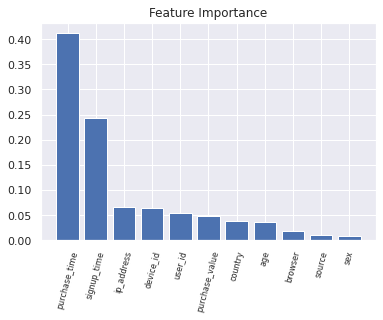

In [84]:
features_importances = rf.feature_importances_
features_importances

indices = np.argsort(features_importances)[::-1]
names = xTrain.columns
names = [xTrain.columns[i] for i in indices]

plt.bar(range(xTest.shape[1]), features_importances[indices])
plt.xticks(range(xTest.shape[1]), names, rotation=75, fontsize = 8)
plt.title("Feature Importance")
plt.show()

#### L'accuracy de l'algo est de 95.04%, donc on peut en déduire qu'il est plutôt fiable en terme de prédiction de fraude
### /!\ Pour un soucis de performances et de rapidité, seules les 5000 premières valeurs sur ~ 135k ont été prises en compte
### Le résultat ne serait peut-être pas le même avec toutes les valeurs

#### Les 3 features ayant le plus d'impact sur la prédiction de fraude sont :
- L'heure de l'achat
- L'heure de connexion
- l'adresse IP